<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 


_Corey Girard, Tova Hirsch, Marco Tavora_


# Exploratory Data Analysis 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

### Importing the data

In [2]:
weather = pd.read_csv('./data/raw/weather.csv')
train = pd.read_csv('./data/raw/train.csv')
test = pd.read_csv('./data/raw/test.csv')
spray = pd.read_csv('./data/raw/spray.csv')
#sample = pd.read_csv('sampleSubmission.csv')

### Data dictionary

#### train.csv and test.csv

- Id: the id of the record
- Date: date that the WNV test is performed
- Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
- Species: the species of mosquitos
- Block: block number of address
- Street: street name
- Trap: Id of the trap
- AddressNumberAndStreet: approximate address returned from GeoCoder
- Latitude, Longitude: Latitude and Longitude returned from GeoCoder
- AddressAccuracy: accuracy returned from GeoCoder
- NumMosquitos: number of mosquitoes caught in this trap
- WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

#### spray.csv 

- Date, Time: the date and time of the spray
- Latitude, Longitude: the Latitude and Longitude of the spray


#### weather.csv 
- Column descriptions in noaa_weather_qclcd_documentation.pdf. 

### Questions from the project instructions:

1. Describe the data
2. What does it represent? 
3. What types are present? 
4. What does each data points' distribution look like? 
5. What kind of cleaning is needed? 
6. Document any potential issues that will need to be resolved

### We first define a function to perform some steps of the EDA:

In [3]:
def eda(df):
    print("1) Are there missing values:")
    if df.isnull().any().unique().shape[0] == 2:
        if df.isnull().any().unique()[0] == False and df.isnull().any().unique()[1] == False:
            print('No\n')
        else:
            print("Yes|Percentage of missing values in each column:\n",df.isnull().sum()/df.shape[0],'\n')
    elif df.isnull().any().unique().shape[0] == 1:
        if df.isnull().any().unique() == False:
            print('No\n')
        else:
            print("Yes|Percentage of missing values in each column:\n",df.isnull().sum()/df.shape[0],'\n')

    print("2) Which are the data types:\n")
    print(df.dtypes,'\n')
    print("3) Dataframe shape:",df.shape)
    print("4) Unique values per columm")
    for col in df.columns.tolist():
        print (col,":",df[col].nunique())  
    print("5) Removing duplicates")
    print('Initial shape:',df.shape)
    df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False).head()
    df.drop_duplicates(inplace=True)
    print('Shape after removing duplicates:',df.shape)
    return

## 1) Looking at `train` `DataFrame`:

In [4]:
train = pd.read_csv('./data/raw/train.csv')
train.head(2)
print("Number of duplicates:",train.duplicated().sum())

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


Number of duplicates: 813


### Feature do be removed
- Address features are redundant some of them can be removed
- `NumMosquitos` and `WnvPresent` are not in the test set. I will remove the first since the number of mosquitos is less relevant than whether West Nile Virus was present in these mosquitos.

In [5]:
print(train.columns.tolist())

['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']


In [6]:
cols_to_keep = ['Date', 'Species', 'Trap','Latitude', 'Longitude', 'WnvPresent']
train = train[cols_to_keep]
train.head()

,Date,Species,Trap,Latitude,Longitude,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,0


#### There are many duplicates

In [7]:
train.shape
train[train.duplicated(keep=False)].head()   # examples of duplicates
train[train.duplicated(keep=False)].shape

(10506, 6)

,Date,Species,Trap,Latitude,Longitude,WnvPresent
98,2007-06-26,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,0
99,2007-06-26,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,0
280,2007-07-11,CULEX RESTUANS,T015,41.974089,-87.824812,0
281,2007-07-11,CULEX RESTUANS,T015,41.974089,-87.824812,0
293,2007-07-11,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,0


(2627, 6)

Using the argument `df` equal to the training set `train`. It removes duplicates among other things:

In [8]:
eda(train)

1) Are there missing values:
No

2) Which are the data types:

Date           object
Species        object
Trap           object
Latitude      float64
Longitude     float64
WnvPresent      int64
dtype: object 

3) Dataframe shape: (10506, 6)
4) Unique values per columm
Date : 95
Species : 7
Trap : 136
Latitude : 138
Longitude : 138
WnvPresent : 2
5) Removing duplicates
Initial shape: (10506, 6)
Shape after removing duplicates: (8610, 6)


In [9]:
print("Number of duplicates:",train.duplicated().sum()) # Sanity check

Number of duplicates: 0


### Comments:
- There are many duplicates which were removed using the function `eda( )`
- Only `Species` can be transformed into dummies. The others have too many unique values.
- We should examine categorical columns to see if they are unbalanced:
  - Using `value_counts` we find that the `WnvPresent` column is highly unbalanced with $\approx$ 95$\%$ of zeros.

In [10]:
round(100*train['WnvPresent'].value_counts()/train.shape[0],0)

0    95.0
1     5.0
Name: WnvPresent, dtype: float64

In [11]:
train.to_csv('./data/temp/train_new.csv')

### Creating dummies from `Species`

In [12]:
train = pd.read_csv('./data/temp/train_new.csv',index_col=0)
train['Date'] = pd.to_datetime(train['Date'])
train = pd.concat([train,pd.get_dummies(train['Species'], drop_first = True)], axis = 1)
train.drop('Species', inplace=True, axis=1)
train.head(2)
train.dtypes

,Date,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,2007-05-29,T002,41.95469,-87.800991,0,0,1,0,0,0,0
1,2007-05-29,T002,41.95469,-87.800991,0,0,0,1,0,0,0


Date                      datetime64[ns]
Trap                              object
Latitude                         float64
Longitude                        float64
WnvPresent                         int64
CULEX PIPIENS                      uint8
CULEX PIPIENS/RESTUANS             uint8
CULEX RESTUANS                     uint8
CULEX SALINARIUS                   uint8
CULEX TARSALIS                     uint8
CULEX TERRITANS                    uint8
dtype: object

### Build a `DataFrame` with the dates broken into pieces

In [13]:
train2 = train.copy()
train2['Year']= train2.Date.dt.year
train2['DayofYear']= train2.Date.dt.dayofyear
train2.drop('Date', inplace=True, axis=1)  
train2.head()

,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,Year,DayofYear
0,T002,41.954690,-87.800991,0,0,1,0,0,0,0,2007,149
1,T002,41.954690,-87.800991,0,0,0,1,0,0,0,2007,149
2,T007,41.994991,-87.769279,0,0,0,1,0,0,0,2007,149
3,T015,41.974089,-87.824812,0,0,1,0,0,0,0,2007,149
4,T015,41.974089,-87.824812,0,0,0,1,0,0,0,2007,149


### Exporting `train` and `train2` after EDA

The `DataFrame` with the full `Date` is kept because it may be useful for merging different dataframes. Hence:
- `'train_after_eda.csv'` has a `Date` column
- `'train_after_eda_without_date.csv'` has no `Date` column but columns `Year` and `DayofYear`

In [14]:
train.to_csv('./data/temp/train_after_eda.csv')
train2.to_csv('./data/temp/train_after_eda_without_date.csv')

## 2) Applying similar changes to the test data

In [15]:
cols_to_keep_test = ['Date', 'Species','Trap', 'Latitude', 'Longitude']

In [16]:
test = pd.read_csv('./data/raw/test.csv')
test['Date'] = pd.to_datetime(test['Date'])
test = test[cols_to_keep_test]
test.head()
print("Number of duplicates:",test.duplicated().sum())

,Date,Species,Trap,Latitude,Longitude
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


Number of duplicates: 1533


In [17]:
test = pd.concat([test,pd.get_dummies(test['Species'], drop_first = True)], axis = 1)
test.drop('Species', inplace=True, axis=1)
test.head()

,Date,Trap,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
0,2008-06-11,T002,41.95469,-87.800991,0,1,0,0,0,0,0
1,2008-06-11,T002,41.95469,-87.800991,0,0,1,0,0,0,0
2,2008-06-11,T002,41.95469,-87.800991,1,0,0,0,0,0,0
3,2008-06-11,T002,41.95469,-87.800991,0,0,0,1,0,0,0
4,2008-06-11,T002,41.95469,-87.800991,0,0,0,0,0,1,0


### Build a `DataFrame` with the dates broken into pieces

In [18]:
test2 = test.copy()
test2['Year']= test2.Date.dt.year
test2['DayofYear']= test2.Date.dt.dayofyear
test2.drop('Date', inplace=True, axis=1)  
test2.head()

,Trap,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,Year,DayofYear
0,T002,41.95469,-87.800991,0,1,0,0,0,0,0,2008,163
1,T002,41.95469,-87.800991,0,0,1,0,0,0,0,2008,163
2,T002,41.95469,-87.800991,1,0,0,0,0,0,0,2008,163
3,T002,41.95469,-87.800991,0,0,0,1,0,0,0,2008,163
4,T002,41.95469,-87.800991,0,0,0,0,0,1,0,2008,163


### Exporting `test` and `test2` after EDA

In [19]:
test.to_csv('./data/temp/test_after_eda.csv')
test2.to_csv('./data/temp/test_after_eda_without_date.csv')

## 3) Now, we look at the `spray` data and perform similar steps:

In [20]:
spray = pd.read_csv('./data/raw/spray.csv')
spray['Date'] = pd.to_datetime(spray['Date'])
spray.head()
spray.dtypes

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

### Print out duplicates

In [21]:
spray[spray.duplicated(keep=False)].head()

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [22]:
eda(spray)

1) Are there missing values:
Yes|Percentage of missing values in each column:
 Date         0.000000
Time         0.039366
Latitude     0.000000
Longitude    0.000000
dtype: float64 

2) Which are the data types:

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object 

3) Dataframe shape: (14835, 4)
4) Unique values per columm
Date : 10
Time : 8583
Latitude : 12887
Longitude : 13007
5) Removing duplicates
Initial shape: (14835, 4)
Shape after removing duplicates: (14294, 4)


### Sanity check

In [23]:
spray[spray.duplicated(keep=False)]

,Date,Time,Latitude,Longitude


Indeed, printing out the `DataFrame` we see that there are several `NaNs` but the percentage is low. 

In [24]:
spray.isnull().sum()
spray[spray['Time'].isnull()].head()
print('% of NaNs in the `Time` column:',round(spray[spray['Time'].isnull()].shape[0]/spray.shape[0],2))

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


% of NaNs in the `Time` column: 0.04


#### We can either drop `NaNs` or remove the column altogether. The second option seems to make more sense since time does look like a relevant variable

In [25]:
#spray.dropna(inplace=True)
spray.drop('Time', inplace=True, axis=1)
spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [26]:
spray.isnull().sum() # Sanity check

Date         0
Latitude     0
Longitude    0
dtype: int64

In [27]:
spray2 = spray.copy()
spray2['Year']= spray2.Date.dt.year
spray2['DayofYear']= spray2.Date.dt.dayofyear
spray2.drop('Date', inplace=True, axis=1)  
spray2.head()

,Latitude,Longitude,Year,DayofYear
0,42.391623,-88.089163,2011,241
1,42.391348,-88.089163,2011,241
2,42.391022,-88.089157,2011,241
3,42.390637,-88.089158,2011,241
4,42.390410,-88.088858,2011,241


In [28]:
spray.to_csv('./data/temp/spray_after_eda.csv')
spray2.to_csv('./data/temp/spray_after_eda_without_date.csv')

## 4) Looking at the `weather` `DataFrame`:

In [29]:
weather = pd.read_csv('./data/raw/weather.csv')

#### Print a `DataFrame` of duplicates rows and its shape

In [30]:
weather[weather.duplicated(keep=False)].head(2)
weather[weather.duplicated(keep=False)].shape[0]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


0

In [31]:
eda(weather)

1) Are there missing values:
No

2) Which are the data types:

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

3) Dataframe shape: (2944, 22)
4) Unique values per columm
Station : 2
Date : 1472
Tmax : 63
Tmin : 54
Tavg : 60
Depart : 42
DewPoint : 54
WetBulb : 48
Heat : 31
Cool : 31
Sunrise : 122
Sunset : 119
CodeSum : 98
Depth : 2
Water1 : 1
SnowFall : 4
PrecipTotal : 168
StnPressure : 104
SeaLevel : 102
ResultSpeed : 190
ResultDir : 36
AvgSpeed : 178
5) Removing duplicates
Initial shape: (2944, 22)
Shape after removing 

The `Water1` column has just 1 value namely  `M` and the latter means missing. We remove this column.

In [32]:
weather['Water1'].value_counts()
weather['Water1'].nunique()
weather['Water1'].unique()
weather.drop('Water1', inplace=True, axis=1)

M    2944
Name: Water1, dtype: int64

1

array(['M'], dtype=object)

The `Depth` column has just two values namely 0 and `M` and the latter means missing. We remove this column.

In [33]:
weather['Depth'].value_counts()
weather['Depth'].nunique()
weather['Depth'].unique()
weather.drop('Depth', inplace=True, axis=1)

M    1472
0    1472
Name: Depth, dtype: int64

2

array(['0', 'M'], dtype=object)

#### Converting dates into `datetime`:

In [34]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [35]:
weather.to_csv('./data/temp/weather_new.csv')

### Concerning stations 1 and 2

- As we saw above, there are two types of `Station`, namely, 1 and 2.

#### From Kaggle's Website Weather Data:

- Hot and dry conditions are more favorable for West Nile virus than cold and wet. 
- We provide you with the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 

    - Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
    - Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
    
- Each date had 2 records, 1 for each `Station=1` and other for `Station=2`. However as we shall see most missing values are in the latter which we will drop.

In [36]:
weather['Station'].value_counts()
weather['Station'].unique()

1    1472
2    1472
Name: Station, dtype: int64

array([1, 2])

#### The `for` below searches each column for data that cannot be converted to numbers:

In [37]:
cols_to_keep = ['Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', \
                'Cool', 'Sunrise', 'Sunset', 'SnowFall', \
                'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

In [38]:
print('Columns with non-convertibles:\n')
for station in [1,2]:
    print('Station',station,'\n')
    weather_station = weather[weather['Station']==station]
    for col in weather_station[cols_to_keep]:
        for x in sorted(weather_station[col].unique()):
            try:
                x = float(x)
            except:
                print(col,'| Non-convertibles, their frequency and their station:',\
                      (x,weather_station[weather_station[col] == x][col].count()))
    print("")

Columns with non-convertibles:

Station 1 

WetBulb | Non-convertibles, their frequency and their station: ('M', 3)
SnowFall | Non-convertibles, their frequency and their station: ('  T', 12)
PrecipTotal | Non-convertibles, their frequency and their station: ('  T', 163)
StnPressure | Non-convertibles, their frequency and their station: ('M', 2)
SeaLevel | Non-convertibles, their frequency and their station: ('M', 5)

Station 2 

Tavg | Non-convertibles, their frequency and their station: ('M', 11)
Depart | Non-convertibles, their frequency and their station: ('M', 1472)
WetBulb | Non-convertibles, their frequency and their station: ('M', 1)
Heat | Non-convertibles, their frequency and their station: ('M', 11)
Cool | Non-convertibles, their frequency and their station: ('M', 11)
Sunrise | Non-convertibles, their frequency and their station: ('-', 1472)
Sunset | Non-convertibles, their frequency and their station: ('-', 1472)
SnowFall | Non-convertibles, their frequency and their statio

In [39]:
weather.to_csv('./data/temp/weather_new_2.csv')

#### Indeed, as stated above, most missing values are in the station 2. We will there drop rows with `Station=2`

In [40]:
weather = weather[weather['Station'] == 1]
weather.dtypes
weather['Station'].unique()
del weather['Station']

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

array([1])

#### Only for station 1 we have:

In [41]:
print('Columns with non-convertibles:\n')
for col in weather[cols_to_keep]:
    for x in sorted(weather[col].unique()):
        try:
            x = float(x)
        except:
            print(col,'| Non-convertibles, their frequency and their station:',
                  (x,weather[weather[col] == x][col].count()))

Columns with non-convertibles:

WetBulb | Non-convertibles, their frequency and their station: ('M', 3)
SnowFall | Non-convertibles, their frequency and their station: ('  T', 12)
PrecipTotal | Non-convertibles, their frequency and their station: ('  T', 163)
StnPressure | Non-convertibles, their frequency and their station: ('M', 2)
SeaLevel | Non-convertibles, their frequency and their station: ('M', 5)


### The strings 'T' and 'M' stand for trace and missing data. Traces are defined to be smaller that 0.05. Following cells take care of that:

In [42]:
cols_with_M = ['WetBulb', 'StnPressure', 'SeaLevel']
for col in cols_with_M:
    weather[col] = weather[col].str.strip()
    weather[col] = weather[col].str.replace('M','0.0').astype(float)
    
cols_with_T = ['SnowFall', 'PrecipTotal']
for col in cols_with_T:
    weather[col] = weather[col].str.replace('  T','0.05').astype(float)
    
for col in cols_to_keep:
    weather[col] = weather[col].astype(float)

In [43]:
weather.to_csv('./data/temp/weather_new_4.csv')

### There are many zeros in the data 

In particular in the columns:

        cols_zeros = ['Heat','Cool','SnowFall']
        
there is a substantial quantity of zeros. We will drop these.

In [44]:
weather = pd.read_csv('./data/temp/weather_new_4.csv',index_col=0)
weather['Date'] = pd.to_datetime(weather['Date'])

In [45]:
cols_zeros = ['Heat','Cool','SnowFall']
for col in cols_zeros:
    print('{}'.format(col),weather[weather[col] == 0.0][col].value_counts()/weather.shape[0]);

Heat 0.0    0.61413
Name: Heat, dtype: float64
Cool 0.0    0.415082
Name: Cool, dtype: float64
SnowFall 0.0    0.991168
Name: SnowFall, dtype: float64


In [46]:
for col in cols_zeros:
    weather.drop(col, inplace=True, axis=1)
weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,448.0,1849.0,,0.00,29.10,29.82,1.7,27.0,9.2
2,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,447.0,1850.0,BR,0.00,29.38,30.09,13.0,4.0,13.4
4,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,446.0,1851.0,,0.00,29.39,30.12,11.7,7.0,11.9
6,2007-05-04,66.0,49.0,58.0,4.0,41.0,50.0,444.0,1852.0,RA,0.05,29.31,30.05,10.4,8.0,10.8
8,2007-05-05,66.0,53.0,60.0,5.0,38.0,49.0,443.0,1853.0,,0.05,29.40,30.10,11.7,7.0,12.0


In [47]:
weather.to_csv('./data/temp/weather_new_5.csv')

In [48]:
weather = pd.read_csv('./data/temp/weather_new_5.csv',index_col=0)
weather['Date'] = pd.to_datetime(weather['Date'])

### `CodeSum`

If `CodeSum` entries are letters, they indicate some significant weather event. We can dummify it.

Let us use regex. We use `'^\w'` to match a string consisting of a single character where that character is alphanumeric (the '\w' means "any word character"), an underscore or an asterisk.

In [49]:
weather['CodeSum'].str.strip()  # strips empty spaces
weather['CodeSum'][weather['CodeSum'].str.contains('^\w')] = '1'
weather['CodeSum'][weather['CodeSum'] !='1'] = '0'

0                           
2                         BR
4                           
6                         RA
8                           
10                          
12                        RA
14                        BR
16                     BR HZ
18                        BR
20                          
22                          
24                          
26                          
28                     RA BR
30                     RA BR
32                          
34                          
36                          
38                   RA VCTS
40                          
42                          
44                          
46                     RA HZ
48                          
50             TSRA RA BR HZ
52                     RA BR
54                        RA
56                     BR HZ
58                        HZ
60                     RA HZ
62                TSRA BR HZ
64                     RA BR
66             TSRA RA BR HZ
68            

/Users/marcotavora/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marcotavora/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
weather['CodeSum']= weather['CodeSum'].astype(int)
weather.dtypes

Date           datetime64[ns]
Tmax                  float64
Tmin                  float64
Tavg                  float64
Depart                float64
DewPoint              float64
WetBulb               float64
Sunrise               float64
Sunset                float64
CodeSum                 int64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir             float64
AvgSpeed              float64
dtype: object

### Sunset and sunrise are obviously correlated

In [51]:
#weather.drop('Sunrise', inplace=True, axis=1)

## 5) Quick stop:  `DataFrames` now

In [52]:
train.isnull().any()
test.isnull().any()
spray.isnull().any()
weather.isnull().any()

Date                      False
Trap                      False
Latitude                  False
Longitude                 False
WnvPresent                False
CULEX PIPIENS             False
CULEX PIPIENS/RESTUANS    False
CULEX RESTUANS            False
CULEX SALINARIUS          False
CULEX TARSALIS            False
CULEX TERRITANS           False
dtype: bool

Date                      False
Trap                      False
Latitude                  False
Longitude                 False
CULEX PIPIENS             False
CULEX PIPIENS/RESTUANS    False
CULEX RESTUANS            False
CULEX SALINARIUS          False
CULEX TARSALIS            False
CULEX TERRITANS           False
UNSPECIFIED CULEX         False
dtype: bool

Date         False
Latitude     False
Longitude    False
dtype: bool

Date           False
Tmax           False
Tmin           False
Tavg           False
Depart         False
DewPoint       False
WetBulb        False
Sunrise        False
Sunset         False
CodeSum        False
PrecipTotal    False
StnPressure    False
SeaLevel       False
ResultSpeed    False
ResultDir      False
AvgSpeed       False
dtype: bool

In [53]:
train.head(2)
train2.head(2)
test.head(2)
test2.head(2)
spray.head(2)
weather.head(2)

,Date,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,2007-05-29,T002,41.95469,-87.800991,0,0,1,0,0,0,0
1,2007-05-29,T002,41.95469,-87.800991,0,0,0,1,0,0,0


,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,Year,DayofYear
0,T002,41.95469,-87.800991,0,0,1,0,0,0,0,2007,149
1,T002,41.95469,-87.800991,0,0,0,1,0,0,0,2007,149


,Date,Trap,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
0,2008-06-11,T002,41.95469,-87.800991,0,1,0,0,0,0,0
1,2008-06-11,T002,41.95469,-87.800991,0,0,1,0,0,0,0


,Trap,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,Year,DayofYear
0,T002,41.95469,-87.800991,0,1,0,0,0,0,0,2008,163
1,T002,41.95469,-87.800991,0,0,1,0,0,0,0,2008,163


,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163


,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,448.0,1849.0,0,0.0,29.10,29.82,1.7,27.0,9.2
2,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,447.0,1850.0,1,0.0,29.38,30.09,13.0,4.0,13.4


In [54]:
train.dtypes
train2.dtypes
test.dtypes
test2.dtypes
weather.dtypes
spray.dtypes

Date                      datetime64[ns]
Trap                              object
Latitude                         float64
Longitude                        float64
WnvPresent                         int64
CULEX PIPIENS                      uint8
CULEX PIPIENS/RESTUANS             uint8
CULEX RESTUANS                     uint8
CULEX SALINARIUS                   uint8
CULEX TARSALIS                     uint8
CULEX TERRITANS                    uint8
dtype: object

Trap                       object
Latitude                  float64
Longitude                 float64
WnvPresent                  int64
CULEX PIPIENS               uint8
CULEX PIPIENS/RESTUANS      uint8
CULEX RESTUANS              uint8
CULEX SALINARIUS            uint8
CULEX TARSALIS              uint8
CULEX TERRITANS             uint8
Year                        int64
DayofYear                   int64
dtype: object

Date                      datetime64[ns]
Trap                              object
Latitude                         float64
Longitude                        float64
CULEX PIPIENS                      uint8
CULEX PIPIENS/RESTUANS             uint8
CULEX RESTUANS                     uint8
CULEX SALINARIUS                   uint8
CULEX TARSALIS                     uint8
CULEX TERRITANS                    uint8
UNSPECIFIED CULEX                  uint8
dtype: object

Trap                       object
Latitude                  float64
Longitude                 float64
CULEX PIPIENS               uint8
CULEX PIPIENS/RESTUANS      uint8
CULEX RESTUANS              uint8
CULEX SALINARIUS            uint8
CULEX TARSALIS              uint8
CULEX TERRITANS             uint8
UNSPECIFIED CULEX           uint8
Year                        int64
DayofYear                   int64
dtype: object

Date           datetime64[ns]
Tmax                  float64
Tmin                  float64
Tavg                  float64
Depart                float64
DewPoint              float64
WetBulb               float64
Sunrise               float64
Sunset                float64
CodeSum                 int64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir             float64
AvgSpeed              float64
dtype: object

Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

In [55]:
train.to_csv('./data/post-eda/train.csv')
train2.to_csv('./data/post-eda/train2.csv')
test.to_csv('./data/post-eda/test.csv')
test2.to_csv('./data/post-eda/test2.csv')
weather.to_csv('./data/post-eda/weather.csv')
spray.to_csv('./data/post-eda/spray.csv')

## 6) Correlations and feature engineering

### Train data

In [56]:
for df in [train,test,spray,weather]:
    df.corr()

,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
Latitude,1.000000,-0.640108,0.030907,-0.041452,0.027364,0.036295,-0.022753,-0.006511,-0.065012
Longitude,-0.640108,1.000000,-0.074075,0.018343,-0.006192,-0.035469,0.009949,0.010471,0.065747
WnvPresent,0.030907,-0.074075,1.000000,0.095826,0.018785,-0.092170,-0.023358,-0.006252,-0.037979
CULEX PIPIENS,-0.041452,0.018343,0.095826,1.000000,-0.499768,-0.342402,-0.054199,-0.014507,-0.088123
CULEX PIPIENS/RESTUANS,0.027364,-0.006192,0.018785,-0.499768,1.000000,-0.567032,-0.089755,-0.024024,-0.145936
CULEX RESTUANS,0.036295,-0.035469,-0.092170,-0.342402,-0.567032,1.000000,-0.061493,-0.016459,-0.099984
CULEX SALINARIUS,-0.022753,0.009949,-0.023358,-0.054199,-0.089755,-0.061493,1.000000,-0.002605,-0.015826
CULEX TARSALIS,-0.006511,0.010471,-0.006252,-0.014507,-0.024024,-0.016459,-0.002605,1.000000,-0.004236
CULEX TERRITANS,-0.065012,0.065747,-0.037979,-0.088123,-0.145936,-0.099984,-0.015826,-0.004236,1.000000


,Latitude,Longitude,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
Latitude,1.000000,-0.648909,0.000740,0.013808,0.003677,-0.003519,-0.003766,-0.003731,-0.003828
Longitude,-0.648909,1.000000,-0.002649,-0.022707,-0.007081,0.006192,0.006704,0.006626,0.006832
CULEX PIPIENS,0.000740,-0.002649,1.000000,-0.147349,-0.143517,-0.141748,-0.141703,-0.141726,-0.141692
CULEX PIPIENS/RESTUANS,0.013808,-0.022707,-0.147349,1.000000,-0.148211,-0.146385,-0.146338,-0.146362,-0.146327
CULEX RESTUANS,0.003677,-0.007081,-0.143517,-0.148211,1.000000,-0.142578,-0.142533,-0.142555,-0.142521
CULEX SALINARIUS,-0.003519,0.006192,-0.141748,-0.146385,-0.142578,1.000000,-0.140776,-0.140799,-0.140765
CULEX TARSALIS,-0.003766,0.006704,-0.141703,-0.146338,-0.142533,-0.140776,1.000000,-0.140754,-0.140720
CULEX TERRITANS,-0.003731,0.006626,-0.141726,-0.146362,-0.142555,-0.140799,-0.140754,1.000000,-0.140743
UNSPECIFIED CULEX,-0.003828,0.006832,-0.141692,-0.146327,-0.142521,-0.140765,-0.140720,-0.140743,1.000000


,Latitude,Longitude
Latitude,1.000000,-0.761842
Longitude,-0.761842,1.000000


,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Tmax,1.000000,0.851965,0.966207,0.683311,0.803170,0.862516,-0.490886,0.558433,-0.037853,0.039866,-0.045456,-0.030421,-0.187049,0.034667,-0.171515
Tmin,0.851965,1.000000,0.957567,0.578054,0.913338,0.906754,-0.470682,0.563374,0.120111,0.127879,-0.068127,-0.039539,-0.112225,0.009511,-0.094538
Tavg,0.966207,0.957567,1.000000,0.658357,0.888062,0.917152,-0.500309,0.582808,0.037840,0.084432,-0.059296,-0.036384,-0.158167,0.024257,-0.140962
Depart,0.683311,0.578054,0.658357,1.000000,0.554093,0.589544,-0.027728,0.027630,0.079295,0.064817,-0.046830,-0.032197,0.020585,0.107721,0.058628
DewPoint,0.803170,0.913338,0.888062,0.554093,1.000000,0.928693,-0.381829,0.470062,0.273803,0.227942,-0.060867,-0.064712,-0.191599,0.013438,-0.159271
WetBulb,0.862516,0.906754,0.917152,0.589544,0.928693,1.000000,-0.428576,0.513161,0.160113,0.164530,0.186177,-0.054496,-0.165417,0.025540,-0.141923
Sunrise,-0.490886,-0.470682,-0.500309,-0.027728,-0.381829,-0.428576,1.000000,-0.971177,-0.019834,-0.056584,0.045353,-0.005278,0.077342,0.138001,0.047156
Sunset,0.558433,0.563374,0.582808,0.027630,0.470062,0.513161,-0.971177,1.000000,0.015761,0.065072,-0.048271,-0.002016,-0.100129,-0.127182,-0.074539
CodeSum,-0.037853,0.120111,0.037840,0.079295,0.273803,0.160113,-0.019834,0.015761,1.000000,0.343029,-0.014655,-0.093113,0.002478,0.045178,0.095038
PrecipTotal,0.039866,0.127879,0.084432,0.064817,0.227942,0.164530,-0.056584,0.065072,0.343029,1.000000,-0.024844,-0.007776,-0.027002,0.056042,0.095667


### The temperatures are highly correlated and other features as well. Let's remove the extra baggage.

In [57]:
#weather.drop('Tmax', inplace=True, axis=1)
#weather.drop('Tmin', inplace=True, axis=1)
#weather.corr()

In [58]:
#weather.drop('WetBulb', inplace=True, axis=1)
#weather.drop('DewPoint', inplace=True, axis=1)
#weather.corr()

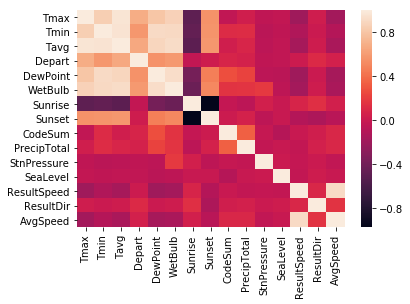

In [59]:
sns.heatmap(weather.corr())

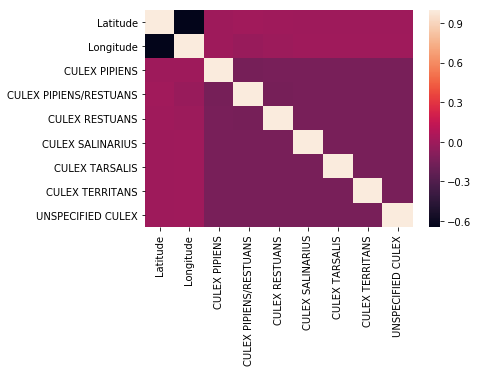

In [60]:
sns.heatmap(test.corr())

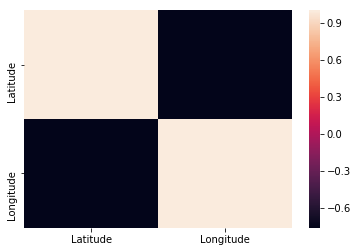

In [61]:
sns.heatmap(spray.corr())

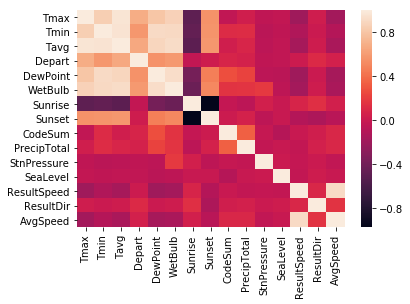

In [62]:
sns.heatmap(weather.corr())

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train.head()
train.tail()

,Date,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,2007-05-29,T002,41.954690,-87.800991,0,0,1,0,0,0,0
1,2007-05-29,T002,41.954690,-87.800991,0,0,0,1,0,0,0
2,2007-05-29,T007,41.994991,-87.769279,0,0,0,1,0,0,0
3,2007-05-29,T015,41.974089,-87.824812,0,0,1,0,0,0,0
4,2007-05-29,T015,41.974089,-87.824812,0,0,0,1,0,0,0


,Date,Trap,Latitude,Longitude,WnvPresent,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
10501,2013-09-26,T035,41.763733,-87.742302,1,0,1,0,0,0,0
10502,2013-09-26,T231,41.987280,-87.666066,0,0,1,0,0,0,0
10503,2013-09-26,T232,41.912563,-87.668055,0,0,1,0,0,0,0
10504,2013-09-26,T233,42.009876,-87.807277,0,0,1,0,0,0,0
10505,2013-09-26,T235,41.776428,-87.627096,0,0,1,0,0,0,0


### Plot of Number of Mosquitos

In [157]:
train_raw = pd.read_csv('./data/raw/train.csv')
num_mosquitos = train_raw[['Trap','NumMosquitos','WnvPresent']]
num_mosquitos[['Trap','NumMosquitos','WnvPresent']].head()

,Trap,NumMosquitos,WnvPresent
0,T002,1,0
1,T002,1,0
2,T007,1,0
3,T015,1,0
4,T015,4,0


In [158]:
NumVirus= num_mosquitos['NumMosquitos']*num_mosquitos['WnvPresent']
num_mosquitos = pd.concat([num_mosquitos,NumVirus],axis=1)
num_mosquitos.columns = ['traps','number_of_mosquitos','presence_of_virus','number_of_virus']
num_mosquitos.head()

,traps,number_of_mosquitos,presence_of_virus,number_of_virus
0,T002,1,0,0
1,T002,1,0,0
2,T007,1,0,0
3,T015,1,0,0
4,T015,4,0,0


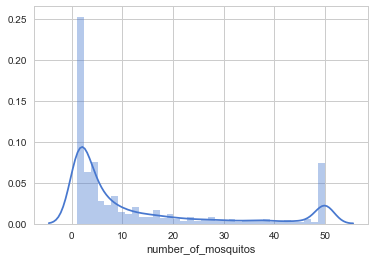

Text(0.5,1,'Virus Incidence')

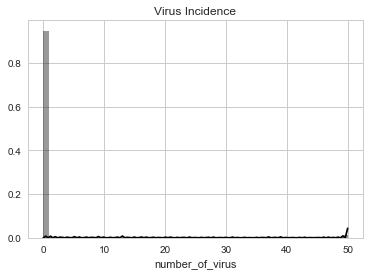

In [159]:
sns.distplot(num_mosquitos['number_of_mosquitos'], color="b")
plt.show()
sns.distplot(num_mosquitos['number_of_virus'], color="black")
plt.title("Virus Incidence")
plt.show()

In [181]:
num_mosquitos_new = num_mosquitos[num_mosquitos['presence_of_virus']>0]
df = num_mosquitos_new['number_of_virus'].groupby(num_mosquitos_new['traps']).sum()
df.value_counts().sort_values(ascending=False).head(100)
df.sort_values(ascending=False).head(100)

7       4
8       3
12      2
143     2
1       2
47      2
5       2
78      2
107     2
112     2
316     2
64      2
23      2
25      2
9       2
10      2
17      2
20      1
103     1
154     1
24      1
482     1
45      1
18      1
16      1
380     1
174     1
42      1
30      1
159     1
74      1
299     1
36      1
37      1
38      1
141     1
157     1
14      1
128     1
122     1
1878    1
227     1
165     1
224     1
95      1
217     1
88      1
87      1
85      1
4       1
80      1
330     1
72      1
275     1
58      1
313     1
185     1
759     1
57      1
500     1
186     1
3       1
44      1
285     1
46      1
26      1
100     1
101     1
102     1
273     1
232     1
105     1
110     1
177     1
281     1
2060    1
6       1
Name: number_of_virus, dtype: int64

traps
T900     2060
T115     1878
T138      759
T002      500
T128      482
T003      380
T008      330
T135      316
T013      316
T030      313
T009      299
T225      285
T233      281
T221      275
T103      273
T086      232
T011      227
T903      224
T016      217
T158      186
T223      185
T054      177
T061      174
T096      165
T114      159
T028      157
T066      154
T143      143
T151      143
T235      141
T031      128
T228      122
T230      112
T231      112
T159      110
T065      107
T014      107
T082      105
T209      103
T215      102
T027      101
T090      100
T212       95
T227       88
T045       87
T033       85
T226       80
T155       78
T094       78
T147       74
T048       72
T039       64
T047       64
T095       58
T220       57
T200       47
T015       47
T006       46
T054C      45
T080       44
T074       42
T035       38
T012       37
T073       36
T081       30
T154       26
T144       25
T145       25
T218       24
T083       23
T070       23


[(0, 0.008), (-5, 400)]

Text(0.5,1,'Virus Incidence')

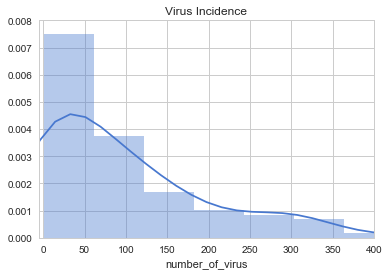

In [174]:
sns.set_style("whitegrid")
g = sns.distplot(df,color='b')
g.set(xlim=(-5,400),ylim=(0,0.008))
plt.title("Virus Incidence")
plt.show(g)